# Linear Regression

This note introduces the **Linear Regression** algorithm using `scikit-learn`, explains the step-by-step logic behind how it works, and then demonstrates a from-scratch implementation to show that the core idea is simple and easy to build.

## What is Linear Regression?

Linear Regression is like drawing the best straight line through a set of points.

The line represents a relationship between the **input feature** and the **predicted value** — like how a person's weight might relate to their height.

It learns from existing data to find the "best fit line" and uses it to make predictions on new data.

This notebook will:

- Use `scikit-learn` to demonstrate how Linear Regression works in practice  
- Explain the logic behind it in an intuitive way  
- Show how to implement the same idea step by step from scratch  

Let’s dive into the details to understand how it works and how to implement it ourselves.

## Preparation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# 1. Load regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = X.flatten()

# 2. Plot function
def plot_regression_line(X, y, w, b, title="Regression Line", label="Model", color="red"):
    plt.scatter(X, y, label="Data", alpha=0.6)
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = w * x_line + b
    plt.plot(x_line, y_line, color=color, label=label)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

## Implement with Scikit-Learn

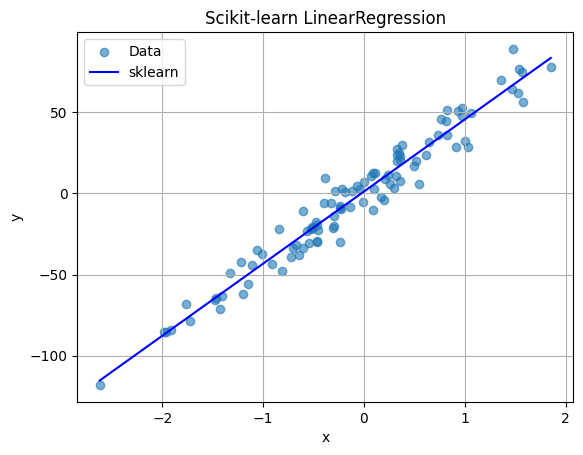

In [ ]:
sk_model = LinearRegression()
sk_model.fit(X.reshape(-1, 1), y)

w_sklearn = sk_model.coef_[0]
b_sklearn = sk_model.intercept_

plot_regression_line(X, y, w_sklearn, b_sklearn, title="Scikit-learn LinearRegression", label="sklearn", color="blue")

## Behind the Scenes

### 1. The Goal

We want to find the best-fitting straight line:

$$
\hat{y} = w \cdot x + b
$$

Where:
- $\hat{y}$ is the predicted value  
- $x$ is the input  
- $w$ is the slope (how steep the line is)  
- $b$ is the intercept (where it crosses the y-axis)

### 2. How Good is the Line? (Cost Function)

To measure how well the line fits the data, we use **Mean Squared Error (MSE)** as our **cost function**:

$$
J(w, b) = \frac{1}{2n} \sum_{i=1}^{n} \left( \hat{y}_i - y_i \right)^2
= \frac{1}{2n} \sum_{i=1}^{n} \left( w x_i + b - y_i \right)^2
$$

This means:
- For each data point, we compute the **difference between predicted and actual value**: $(\hat{y}_i - y_i)$
- Then we **square the difference** to:
  - Make all errors positive (cancel out minus and plus)
  - Make the model more sensitive to **larger errors**
- Finally, we average the squared errors across all $n$ samples

We use $\frac{1}{2n}$ instead of $\frac{1}{n}$ to simplify the math when we take derivatives later.

### 3. How to Minimize the Cost? (Gradient Descent)

We want to adjust the values of $w$ and $b$ to make the cost function $J(w, b)$ as small as possible.

To do this, we use an algorithm called **gradient descent**, which:
- Calculates the slope of the cost function
- Takes small steps in the direction that reduces the cost
- Repeats this process **over and over again** — adjusting $w$ and $b$ a little each time

It keeps checking:
> "Which direction should I move to make the cost smaller?"

To move in that direction, we compute the partial derivatives:

$$
\frac{\partial J}{\partial w} \quad \text{and} \quad \frac{\partial J}{\partial b}
$$

And update like this:

$$
w := w - \alpha \cdot \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \cdot \frac{\partial J}{\partial b}
$$

> $\alpha$ is the **learning rate** — a small number that controls how big each update step is

This cycle of "calculate slope → move → calculate again" continues until the model improves and the cost becomes low enough.

Before diving into the derivative formulas, let’s quickly review two key tools that make it all work.

### 4. A Quick Review: Power Rule and Chain Rule

#### Power Rule:

If a function contains a square like:

$$
f(x) = x^2
$$

Then the derivative is:

$$
\frac{d}{dx} f(x) = 2x
$$

This means:

If your function contains something squared, its derivative will be **2 times that thing**.

#### Chain Rule:

Now, what if the thing being squared is itself a function?  
Let’s say:

$$
f(x) = [g(x)]^2
$$

Then the chain rule says:

$$
\frac{d}{dx} f(x) = 2 \cdot g(x) \cdot g'(x)
$$

This means:
- You treat the whole inner function $g(x)$ like a single variable and apply the power rule: $2 \cdot g(x)$
- Then multiply by the **derivative of the inside part**: $g'(x)$

So:  

**Chain rule = outer derivative × inner derivative**

### 5. Derivatives Step-by-Step (Putting It All Together)

Now we compute $\frac{\partial J}{\partial w}$ and $\frac{\partial J}{\partial b}$ **separately**, starting from a single data point to keep things simple.

Let’s say we have just one data point:

- Input: $x$
- Actual output: $y$
- Predicted output: $\hat{y} = wx + b$

So the cost for this single point is:

$$
J = (wx + b - y)^2
$$

We define the **inner function**:

$$
u = wx + b - y
$$

So the cost becomes:

$$
J = u^2
$$

This prepares us to apply the **chain rule** to $J = u^2$.

#### Derivative with respect to \( w \)

Step-by-step:

$$
\frac{dJ}{dw} = \frac{d}{dw} (u^2)
$$

Now apply the chain rule:

- Outer derivative: $\frac{d}{du}(u^2) = 2u$
- Inner derivative:
  - $\frac{du}{dw} = x$, because when we change $w$, only the $wx$ term affects the slope. $x$ is constant, so the slope is $x$

So:

$$
\frac{dJ}{dw} = 2u \cdot x = 2(wx + b - y) \cdot x
$$

#### Derivative with respect to \( b \)

Same logic:

$$
\frac{dJ}{db} = \frac{d}{db} (u^2)
$$

Apply the chain rule:

- Outer derivative: $\frac{d}{du}(u^2) = 2u$
- Inner derivative:
  - $\frac{du}{db} = 1$, because when we change $b$, it directly adds to $u$. The slope is 1, and other parts don’t change

So:

$$
\frac{dJ}{db} = 2(wx + b - y)
$$

### 6. Generalizing to All Data Points

Now that we’ve understood the derivatives for a single data point, we can scale this up to the whole dataset.

We repeat the same process for each training example $(x_i, y_i)$ and sum the gradients.  
Our full cost function over all points is:

$$
J(w, b) = \frac{1}{2n} \sum_{i=1}^{n} \left( w x_i + b - y_i \right)^2
$$

#### Derivative with respect to \( w \)

Apply the chain rule:

- Outer derivative of the square: $2(w x_i + b - y_i)$
- Inner derivative with respect to $w$: $x_i$

So the full gradient becomes:

$$
\frac{\partial J}{\partial w}
= \frac{1}{2n} \sum_{i=1}^{n} 2(w x_i + b - y_i) \cdot x_i
$$

Now cancel the 2s:

$$
\frac{\partial J}{\partial w}
= \frac{1}{n} \sum_{i=1}^{n} (w x_i + b - y_i) \cdot x_i
$$

#### Derivative with respect to \( b \)

Same idea:

- Outer derivative: $2(w x_i + b - y_i)$
- Inner derivative with respect to $b$: $1$

So:

$$
\frac{\partial J}{\partial b}
= \frac{1}{2n} \sum_{i=1}^{n} 2(w x_i + b - y_i)
$$

Cancel the 2s:

$$
\frac{\partial J}{\partial b}
= \frac{1}{n} \sum_{i=1}^{n} (w x_i + b - y_i)
$$

### 7. When to Stop: Convergence Criteria

Gradient descent doesn’t just make one update — it **keeps looping**:

1. Calculate the gradient (slope) using the current values of $w$ and $b$
2. Use the learning rate $\alpha$ to take a step downhill
3. Repeat: update $w$, update $b$, and calculate again

This cycle continues until one of the following happens:

- **Convergence**: The cost becomes very small, and further updates barely change the result. For example, if the difference in cost between steps is less than a small number like $10^{-6}$, we say it’s close enough.

- **Maximum iterations**: We set a safety limit (e.g. 1000 steps) so it won’t run forever.

- **No significant improvement**: If the cost hasn’t improved for many steps, we might be stuck in a flat spot or local minimum. In that case, it’s better to stop early.

> So gradient descent is like a climber constantly feeling the slope, moving slowly downhill — and stopping when it’s either flat enough, time’s up, or there's no more progress.

This completes the core learning process — now we’re ready to visualize or implement it in code!

## Let's Code It 


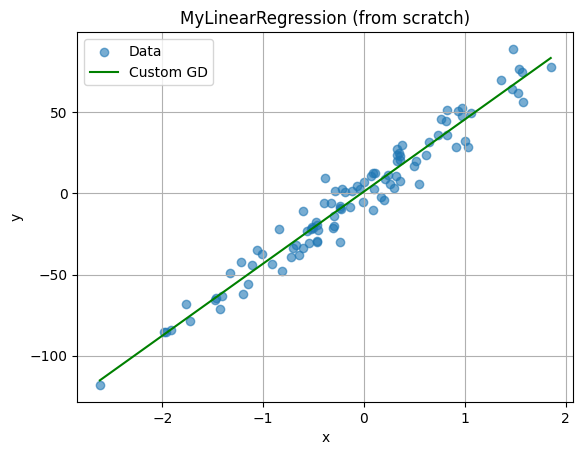

In [ ]:
class MyLinearRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6):
        # Learning rate α: controls step size in gradient descent (Section 3)
        self.alpha = learning_rate

        # Maximum number of gradient descent iterations (Section 7)
        self.max_iter = max_iter

        # Tolerance for convergence: stop if cost change is very small (Section 7)
        self.tol = tol

        # Initialize weights (w: slope, b: intercept) to zero (Section 5 start)
        self.w = 0
        self.b = 0

    def fit(self, X, y):
        n = len(X)  # number of training samples

        # Start with w = 0 and b = 0 as initial guesses
        w, b = 0.0, 0.0

        # Track previous cost to check for convergence (Section 7)
        prev_cost = float('inf')

        # Gradient Descent Loop (Section 3)
        for i in range(self.max_iter):
            # Predict y: ŷ = w * x + b (Section 1)
            y_pred = w * X + b

            # Error = prediction - actual (Section 2)
            error = y_pred - y

            # Mean Squared Error cost function (Section 2)
            cost = (1 / (2 * n)) * np.sum(error ** 2)

            # Convergence check: stop if cost doesn't improve much (Section 7)
            if abs(prev_cost - cost) < self.tol:
                print(f"Converged at iteration {i}, cost: {cost:.6f}")
                break
            prev_cost = cost

            # Compute gradients (Section 6)
            # dJ/dw = (1/n) ∑ (w x_i + b - y_i) * x_i
            dw = (1 / n) * np.sum(error * X)

            # dJ/db = (1/n) ∑ (w x_i + b - y_i)
            db = (1 / n) * np.sum(error)

            # Update parameters (Section 3)
            w -= self.alpha * dw
            b -= self.alpha * db

        # Store the learned weights after training
        self.w = w
        self.b = b

    def predict(self, X):
        # Make predictions using learned weights (Section 1 again)
        return self.w * X + self.b

# 5. Fit with custom model and plot
my_model = MyLinearRegression(learning_rate=0.01, max_iter=1000)
my_model.fit(X, y)

plot_regression_line(X, y, my_model.w, my_model.b,
                     title="MyLinearRegression (from scratch)",
                     label="Custom GD", color="green")

## It Works!!

The regression line produced by our scratch implementation closely matches the result from **scikit-learn**.

This confirms that the gradient descent logic — computing the cost, applying the chain rule, and updating the parameters — behaves exactly as expected.

We've successfully built **Linear Regression** from the ground up!